## How to pull from databases

In this example, we will show how to pull reference information from several databases (e.g. UniProt, KEGG, etc) to construct a multi-omics relationship network. This information can be combined with literature. Here we will focus on only database information for *Bacillus subtilis*. To save time, these files are already committed to the repository. 

**Standardized IDs**

For simplicity, IDs are standardized as defined in the table below. Note that ID mismatching is possible, and certain IDs may or may not be matched. Manual inspection of the results is necessary, especially in cases where specific pathways are needed. Ensemble IDs can be collapsed and mapped back to UniProt IDs using the `map_ensembl_to_uniprot`

| Term | Type | ID |
|------|------|----|
| Gene Product | Gene | Ensembl ID |
| Gene Product | Protein | UniProt ID | 
| Metabolite | -- | CHEBI ID | 
| Lipidome | -- | LipidMaps ID (LMID) |

In [1]:
import os
import ppi_pipeline as ppi
import pandas as pd

# Define the output directory
output_directory = os.path.join(os.getcwd(), "database_example")

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

### Pull a proteome

Several downstream functions require a proteome for matching terms to IDs. Here is how to pull one. Search for a proteome ID here: https://www.uniprot.org/proteomes/. It starts with "UP"

In [3]:
# Extract proteome - then move to omes folder!! 
ppi.pull_proteome("UP000001570", output_directory)

### UniProt

Extract protein-protein and protein-metabolite interactions with UniProt. 

In [4]:
ppi.pull_uniprot(1423, output_directory, verbose = True)

...pulling organism metadata
...parsing protein-protein relationships
...parsing protein-metabolite relationships


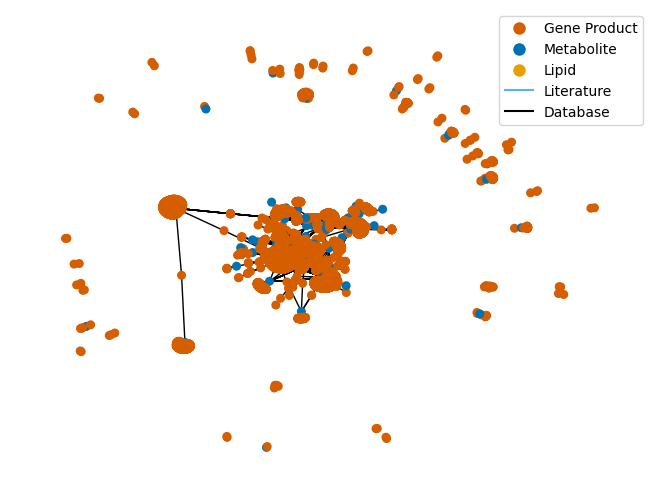

In [2]:
ppi.visualize_network(pd.read_csv("./database_example/1423_uniprot.txt", sep = "\t").dropna().reset_index(drop = True), edge_weight = 1)

### WikiPathways

WikiPathways requires both a species name (see https://www.wikipathways.org/browse/organisms.html) and a species ID. All biomolecules in a pathway are collapsed into relationships.

In [3]:
ppi.pull_wikipathways(species_name = "Bacillus subtilis", 
                      species_id = "1423", 
                      omes_folder = "../omes", 
                      proteome_filename = "UP000001570_proteome.txt", 
                      output_directory= output_directory, 
                      verbose = True)

Extracting entities for: WP1466
...Mapping terms to standardized IDs
Extracting entities for: WP1527
WP1527 not found
Extracting entities for: WP2360
...Mapping terms to standardized IDs


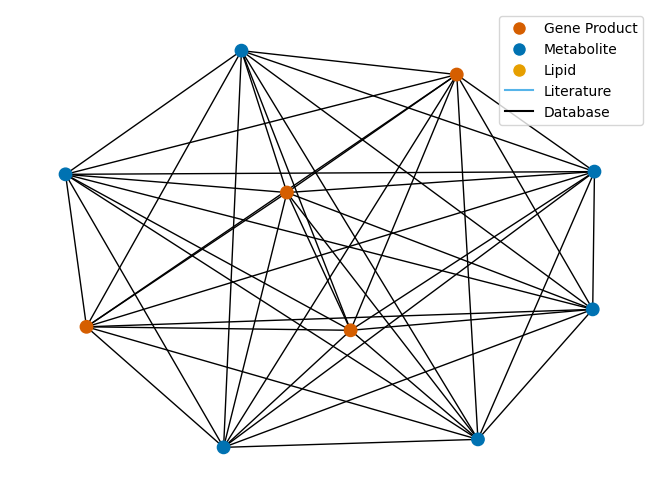

In [5]:
ppi.visualize_network(pd.read_csv("./database_example/1423_wikipathways.txt", sep = "\t"), edge_weight = 1, node_size = 80)

### KEGG

KEGG requires a species ID that can be found here: https://rest.kegg.jp/list/organism. For each organism, all pathways are identified, and from the pathways, all modules are pulled. All biomolecules in a module are collapsed and considered related if "flatten_module" is set to True. Otherwise, the metabolic relationships are maintained.

In [ ]:
ppi.pull_kegg(
    kegg_species_id = "bsu",
    omes_folder = "../omes",
    proteome_filename = "UP000001570_proteome.txt", 
    output_directory = output_directory,
    flatten_module = True,
    verbose = True
)

...extracting organism information
...pulling pathways. ETA: 187.5 seconds
...pulling modules. ETA: 316 seconds


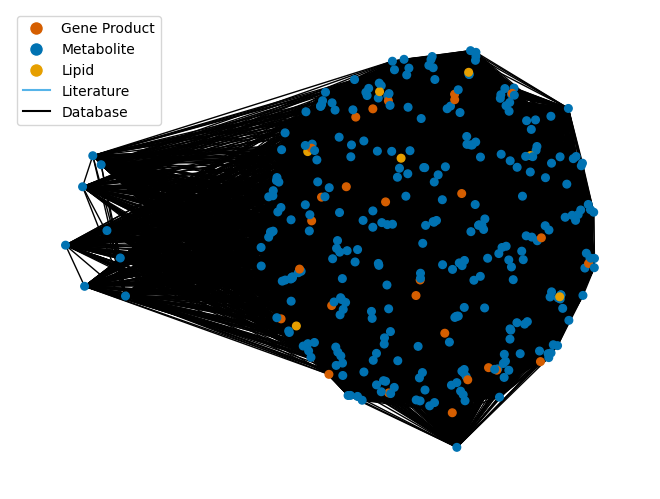

In [3]:
ppi.visualize_network(pd.read_csv("./database_example/bsu_kegg.txt", sep = "\t"), edge_weight = 1)

### LipidMaps 

LipidMaps relationships can be pulled from a json file here: https://www.lipidmaps.org/resources/tools/reactions and parsed with the `parse_lipidome_relationships.py` script in the omes folder. The file is already processed and can be read in as is. 

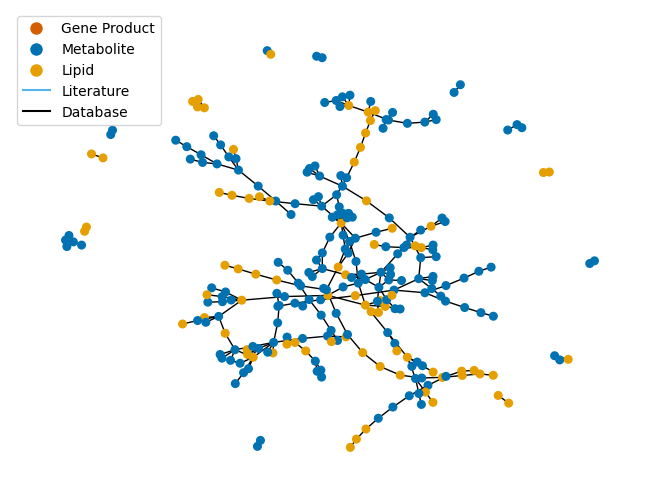

In [37]:
ppi.visualize_network(pd.read_csv("../omes/LipidMaps_Relationships.txt", sep = "\t"), edge_weight = 1)